<a href="https://colab.research.google.com/github/OUCHAOUA/Apriori-algorithm/blob/master/Apriori_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Association Rules
Let's say you are a Machine Learning engineer working for a clothing company and you want to adopt new strategies  to improve the company profit .
Use this dataset and the association rules mining to find new marketing plans . 

Note here that one of the strategies can be based on which items should be put together

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Bonus: try to do some visualization before applying the Apriori algorithm.

Let's do the same checkpoint but with a bigger dataset !



In [2]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

**Visualisation with wordCoud**

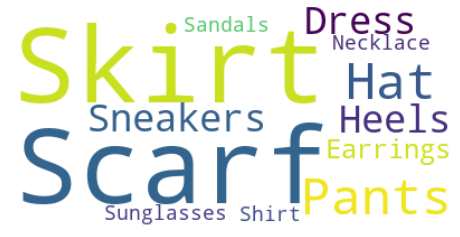

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ''

def word_cloud(dataset):
  words = ''
  for review in dataset:
    words += " ".join(review)+" "
  return words

wordcloud = WordCloud(background_color="white").generate(word_cloud(dataset))

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Apply the Apriori algorithm** min_support at 0.4

In [150]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import pandas as pd

te=TransactionEncoder()
te_data=te.fit(dataset).transform(dataset)
data_x=pd.DataFrame(te_data,columns=te.columns_)
print(data_x.head())

frequent_items= apriori(data_x, use_colnames=True, min_support=0.4)
print(frequent_items.head())

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

   Dress  Earrings    Hat  Heels  ...  Shirt  Skirt  Sneakers  Sunglasses
0  False     False   True  False  ...  False   True      True       False
1  False     False   True  False  ...  False   True      True        True
2   True     False  False   True  ...  False  False     False       False
3   True      True   True   True  ...  False  False     False       False
4  False      True  False  False  ...   True   True     False       False

[5 rows x 12 columns]
   support    itemsets
0      0.4     (Dress)
1      0.4  (Earrings)
2      0.6       (Hat)
3      0.4     (Heels)
4      0.8     (Pants)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Heels,Dress,0.4,0.4,0.4,1.000000,2.500000,0.24,inf
1,Dress,Heels,0.4,0.4,0.4,1.000000,2.500000,0.24,inf
2,Dress,Scarf,0.4,0.8,0.4,1.000000,1.250000,0.08,inf
3,Scarf,Dress,0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
4,Earrings,Scarf,0.4,0.8,0.4,1.000000,1.250000,0.08,inf
...,...,...,...,...,...,...,...,...,...
61,Sneakers,Pants,0.4,0.4,0.4,1.000000,2.500000,0.24,inf
62,Pants,Hat,0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
63,Hat,Pants,0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
64,Sneakers,Pants,0.4,0.4,0.4,1.000000,2.500000,0.24,inf


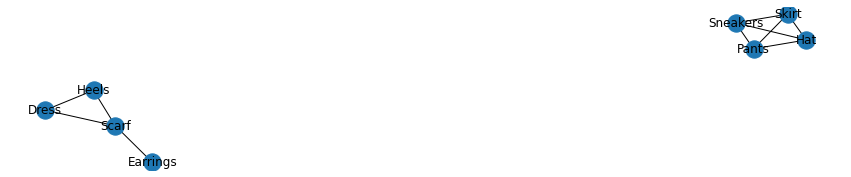

In [151]:
import networkx as nx
fig, ax=plt.subplots(figsize=(15,3))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

# Trying with a big data set

In [16]:
from google.colab import files
data_to_load = files.upload()
 
import io
data = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
data

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation (2).csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
import numpy as np
trans = np.empty([data.shape[0], data.shape[1]], dtype=object)
for i in range(0, trans.shape[0]):
  for j in range(0, trans.shape[1]):
    if data.values[i,j] != np.nan  : 
      trans[i,j] = str(data.values[i,j])
lst = [] 
for i in range(0, trans.shape[0]):
  lst_1 = list(set(trans[i]))
  if 'nan'in lst_1: lst_1.remove('nan')
  lst.append(lst_1)


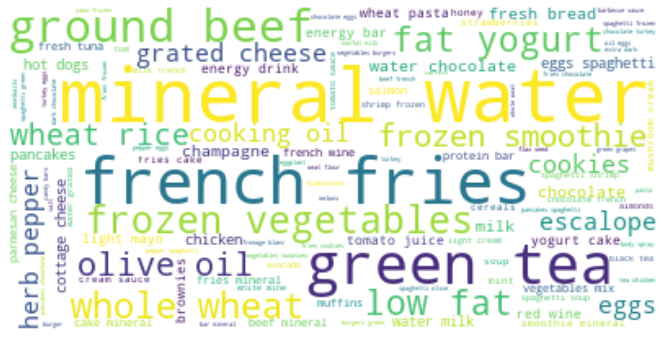

In [148]:
words = ''

wordcloud = WordCloud(background_color="white").generate(word_cloud((lst)))

# Display the generated image:
plt.figure(figsize = (15, 6), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [137]:
te=TransactionEncoder()
te_data=te.fit(lst).transform(lst)
data_x=pd.DataFrame(te_data,columns=te.columns_)
print(data_x.head())

frequent_items= apriori(data_x, use_colnames=True, min_support=0.0045)
print(frequent_items.head())
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

    asparagus  almonds  antioxydant juice  ...   yams  yogurt cake  zucchini
0       False     True               True  ...   True        False     False
1       False    False              False  ...  False        False     False
2       False    False              False  ...  False        False     False
3       False    False              False  ...  False        False     False
4       False    False              False  ...  False        False     False

[5 rows x 120 columns]
    support             itemsets
0  0.020397            (almonds)
1  0.008932  (antioxydant juice)
2  0.004666          (asparagus)
3  0.033329            (avocado)
4  0.004533        (babies food)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,almonds,burgers,0.020397,0.087188,0.005199,0.254902,2.923577,0.003421,1.225089
1,burgers,almonds,0.087188,0.020397,0.005199,0.059633,2.923577,0.003421,1.041724
2,almonds,chocolate,0.020397,0.163845,0.005999,0.294118,1.795099,0.002657,1.184553
3,chocolate,almonds,0.163845,0.020397,0.005999,0.036615,1.795099,0.002657,1.016834
4,almonds,eggs,0.020397,0.179709,0.006532,0.320261,1.782108,0.002867,1.206774
...,...,...,...,...,...,...,...,...,...
2239,mineral water,spaghetti,0.047994,0.027863,0.004533,0.094444,3.389607,0.003195,1.073526
2240,spaghetti,frozen vegetables,0.174110,0.011065,0.004533,0.026034,2.352756,0.002606,1.015369
2241,frozen vegetables,spaghetti,0.095321,0.015731,0.004533,0.047552,3.022804,0.003033,1.033410
2242,mineral water,spaghetti,0.238368,0.008266,0.004533,0.019016,2.300588,0.002562,1.010958


In [145]:
rules_grf = rules.sort_values(by=['conviction', 'confidence', 'lift'], ascending=False).head(50)

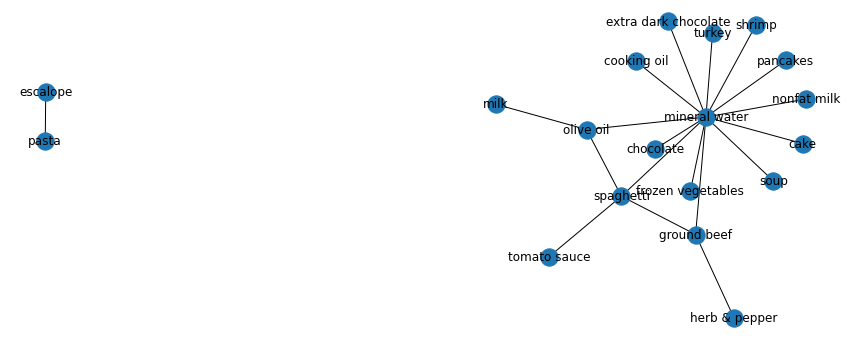

In [146]:
import networkx as nx


fig, ax=plt.subplots(figsize=(15,6))
GA=nx.from_pandas_edgelist(rules_grf,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()